# Installing and importing relevant libraries

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from pathlib import Path

pd.set_option('display.max_columns', None)

# Data

## Defining relevant paths

In [2]:
data_dir_path = Path("../data/raw")
songs_data_path = data_dir_path / "Music_Info.csv"
users_data_path = data_dir_path / "User_Listening_History.csv"

## Viewing the data

In [3]:
df_songs = pd.read_csv(songs_data_path)
df_songs.head()

track_id             name           artist  \
0  TRIOREW128F424EAF0   Mr. Brightside      The Killers   
1  TRRIVDJ128F429B0E8       Wonderwall            Oasis   
2  TROUVHL128F426C441  Come as You Are          Nirvana   
3  TRUEIND128F93038C4      Take Me Out  Franz Ferdinand   
4  TRLNZBD128F935E4D8            Creep        Radiohead   

                                 spotify_preview_url              spotify_id  \
0  https://p.scdn.co/mp3-preview/4d26180e6961fd46...  09ZQ5TmUG8TSL56n0knqrj   
1  https://p.scdn.co/mp3-preview/d012e536916c927b...  06UfBBDISthj1ZJAtX4xjj   
2  https://p.scdn.co/mp3-preview/a1c11bb1cb231031...  0keNu0t0tqsWtExGM3nT1D   
3  https://p.scdn.co/mp3-preview/399c401370438be4...  0ancVQ9wEcHVd0RrGICTE4   
4  https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...  01QoK9DA7VTeTSE3MNzp4I   

                                                tags genre  year  duration_ms  \
0  rock, alternative, indie, alternative_rock, in...   NaN  2004       222200   
1  rock, alternative, indie, pop, alternative_roc...   NaN  2006       258613   
2   rock, alternative, alternative_rock, 90s, grunge   RnB  1991       218920   
3  rock, alternative, indie, alternative_rock, in...   NaN  2004       237026   
4  rock, alternative, indie, alternative_rock, in...   RnB  2008       238640   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.355   0.918    1    -4.360     1       0.0746      0.001190   
1         0.409   0.892    2    -4.373     1       0.0336      0.000807   
2         0.508   0.826    4    -5.783     0       0.0400      0.000175   
3         0.279   0.664    9    -8.851     1       0.0371      0.000389   
4         0.515   0.430    7    -9.935     1       0.0369      0.010200   

   instrumentalness  liveness  valence    tempo  time_signature  
0          0.000000    0.0971    0.240  148.114               4  
1          0.000000    0.2070    0.651  174.426               4  
2          0.000459    0.0878    0.543  120.012               4  
3          0.000655    0.1330    0.490  104.560               4  
4          0.000141    0.1290    0.104   91.841               4

# Preliminary analysis

In [4]:
df_songs.shape

(50683, 21)

The data has 50,683 rows and 21 columns.

In [5]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [6]:
df_songs["track_id"].nunique()

50683

In [7]:
df_songs["spotify_preview_url"].nunique()

50620

In [8]:
df_songs["spotify_id"].nunique()

50674

The columns `track_id`, `spotify_preview_url`, and `spotify_id` have unique values for almost all the rows, with `track_id` being unique for all. So, we may want to drop it later.

In [9]:
cols_to_drop = [
    # "track_id",
    # "spotify_preview_url",
    # "spotify_id",
]  # Not dropping these for now
df_songs.drop(columns=cols_to_drop, inplace=True)
df_songs.head()

track_id             name           artist  \
0  TRIOREW128F424EAF0   Mr. Brightside      The Killers   
1  TRRIVDJ128F429B0E8       Wonderwall            Oasis   
2  TROUVHL128F426C441  Come as You Are          Nirvana   
3  TRUEIND128F93038C4      Take Me Out  Franz Ferdinand   
4  TRLNZBD128F935E4D8            Creep        Radiohead   

                                 spotify_preview_url              spotify_id  \
0  https://p.scdn.co/mp3-preview/4d26180e6961fd46...  09ZQ5TmUG8TSL56n0knqrj   
1  https://p.scdn.co/mp3-preview/d012e536916c927b...  06UfBBDISthj1ZJAtX4xjj   
2  https://p.scdn.co/mp3-preview/a1c11bb1cb231031...  0keNu0t0tqsWtExGM3nT1D   
3  https://p.scdn.co/mp3-preview/399c401370438be4...  0ancVQ9wEcHVd0RrGICTE4   
4  https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...  01QoK9DA7VTeTSE3MNzp4I   

                                                tags genre  year  duration_ms  \
0  rock, alternative, indie, alternative_rock, in...   NaN  2004       222200   
1  rock, alternative, indie, pop, alternative_roc...   NaN  2006       258613   
2   rock, alternative, alternative_rock, 90s, grunge   RnB  1991       218920   
3  rock, alternative, indie, alternative_rock, in...   NaN  2004       237026   
4  rock, alternative, indie, alternative_rock, in...   RnB  2008       238640   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.355   0.918    1    -4.360     1       0.0746      0.001190   
1         0.409   0.892    2    -4.373     1       0.0336      0.000807   
2         0.508   0.826    4    -5.783     0       0.0400      0.000175   
3         0.279   0.664    9    -8.851     1       0.0371      0.000389   
4         0.515   0.430    7    -9.935     1       0.0369      0.010200   

   instrumentalness  liveness  valence    tempo  time_signature  
0          0.000000    0.0971    0.240  148.114               4  
1          0.000000    0.2070    0.651  174.426               4  
2          0.000459    0.0878    0.543  120.012               4  
3          0.000655    0.1330    0.490  104.560               4  
4          0.000141    0.1290    0.104   91.841               4

## Missing Values

In [10]:
df_songs.isna().sum()

track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                    1127
genre                  28335
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
dtype: int64

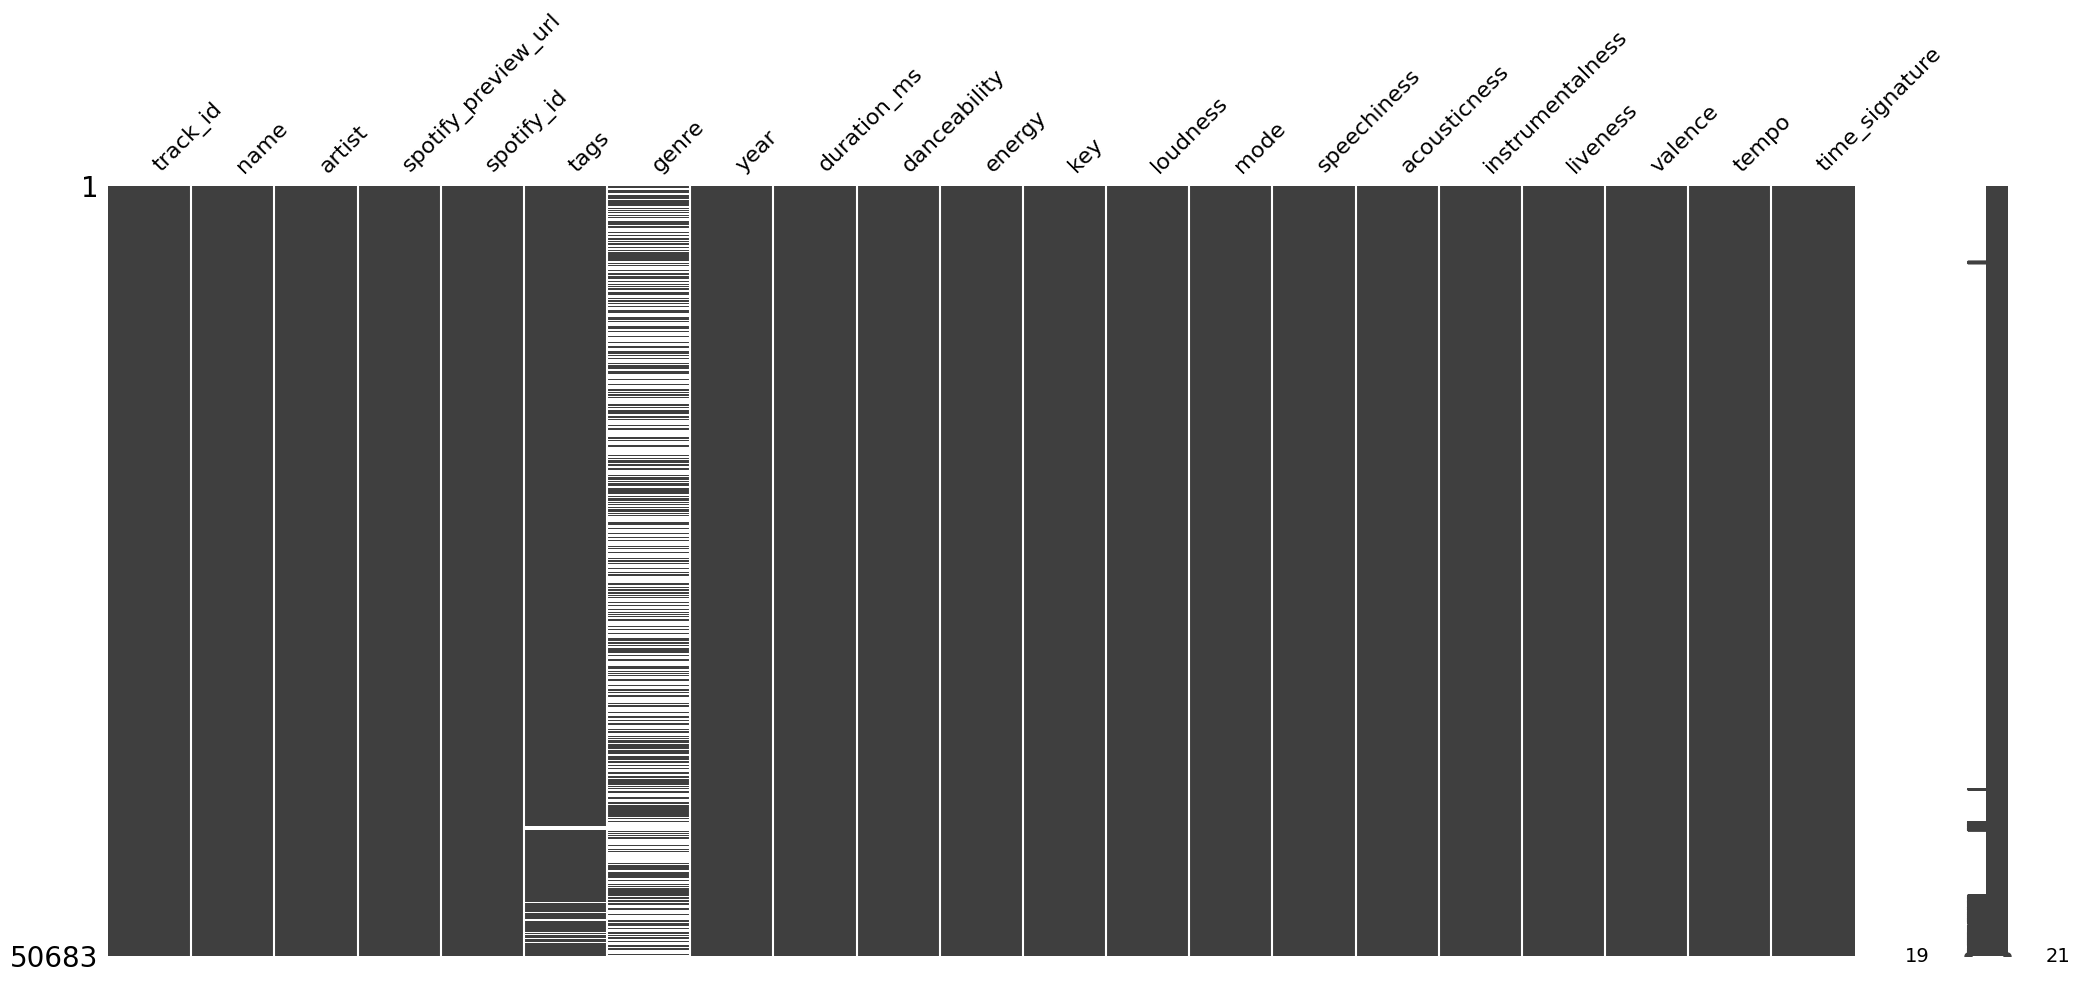

In [11]:
msno.matrix(df_songs);

Clearly, the column `genre` has a lot of missing values, whereas the column `tags` has very few missing values. And these values are missing at random.

In [12]:
df_songs[["tags", "genre"]].isna().mean().mul(100)

tags      2.223625
genre    55.906320
dtype: float64

## Duplicates

In [13]:
df_songs.duplicated().any()

np.False_

There are no duplicates in the data. However, we should also check if there are rows with the same song. We will first convert all the values in the `name` column to lower and then check for duplicates.

In [14]:
df_songs["name"].str.lower().duplicated().sum()

np.int64(815)

In [15]:
df_songs.loc[df_songs["name"].str.lower().duplicated(keep=False)].sort_values("name")

track_id           name                 artist  \
6588   TRGGALK12903CB68E5           3 AM        Matchbox Twenty   
34480  TRKKZMK128F4257579           3 am           Liv Kristine   
29795  TRLOXMF128F934BF04            3AM        Matchbox Twenty   
43800  TRPWOAS128E0781045            3am                 Halsey   
38764  TRXEFAP128F9321AB7    4th Of July             Aimee Mann   
...                   ...            ...                    ...   
40027  TRHLKXB128F9330FB4      the waves  All My Faith Lost ...   
39171  TRADNPA12903CBDADE     time to go             Wax Tailor   
43632  TRAZKLR128F92C6584  under the sun         Do As Infinity   
50673  TROIHJK12903CECC08            you  High And Mighty Color   
27680  TRXWPMW12903CB42A0        zombies       Childish Gambino   

                                     spotify_preview_url  \
6588   https://p.scdn.co/mp3-preview/cb68c9ae8925bb3f...   
34480  https://p.scdn.co/mp3-preview/7d91eb9292e9c7c7...   
29795  https://p.scdn.co/mp3-preview/cb68c9ae8925bb3f...   
43800  https://p.scdn.co/mp3-preview/afe9a1433dfe18b6...   
38764  https://p.scdn.co/mp3-preview/fdda379ed8d895e0...   
...                                                  ...   
40027  https://p.scdn.co/mp3-preview/f295a6202baf763e...   
39171  https://p.scdn.co/mp3-preview/c7b4c61ab5112be4...   
43632  https://p.scdn.co/mp3-preview/6f7a1ff40803a831...   
50673  https://p.scdn.co/mp3-preview/d46dcb99b647a800...   
27680  https://p.scdn.co/mp3-preview/567c4e26de4da89a...   

                   spotify_id  \
6588   5vYA1mW9g2Coh1HUFUSmlb   
34480  1TgsnkiolcBhQssCR37JXx   
29795  5vYA1mW9g2Coh1HUFUSmlb   
43800  1OfLNb6dQ9dra1B58iT9Ex   
38764  2fW1zQeo6QEhZviaudZvBu   
...                       ...   
40027  3yRACVTfhDtcgdlJBmAC2k   
39171  0IE64wOdOdeGXSOFjbHjRP   
43632  6AWpZWTZkuzCctkgh1mtbG   
50673  567nudtJeyQ5Tq9Ij9vmHe   
27680  73kAUSAht4YOR7xNPmNb2L   

                                                    tags genre  year  \
6588   rock, alternative, pop, alternative_rock, 90s,...   NaN  1996   
34480  female_vocalists, power_metal, gothic_metal, g...   NaN  2005   
29795  rock, alternative, 90s, piano, american, pop_rock   NaN  1996   
43800                                           pop_rock   NaN  2020   
38764  rock, female_vocalists, singer_songwriter, gui...   NaN  2004   
...                                                  ...   ...   ...   
40027                               gothic, dark_ambient   NaN  2007   
39171                             indie, indie_rock, idm   NaN  2012   
43632                                    japanese, j_pop   NaN  2009   
50673        rock, female_vocalists, hard_rock, japanese   NaN  2009   
27680                                               funk   NaN  2016   

       duration_ms  danceability  energy  key  loudness  mode  speechiness  \
6588        225946         0.521   0.673    8    -8.685     1       0.0284   
34480       302880         0.516   0.840    0    -6.038     0       0.0390   
29795       225946         0.521   0.673    8    -8.685     1       0.0284   
43800       234858         0.385   0.871    0    -4.604     0       0.0795   
38764       209173         0.432   0.296    5   -10.926     1       0.0325   
...            ...           ...     ...  ...       ...   ...          ...   
40027       271133         0.230   0.219    9   -13.877     0       0.0339   
39171       209920         0.671   0.786    7    -6.162     0       0.0855   
43632       241241         0.315   0.988    2    -1.206     0       0.0950   
50673       241476         0.340   0.838    7    -4.434     1       0.0485   
27680       281813         0.653   0.411    0   -11.986     1       0.1270   

       acousticness  instrumentalness  liveness  valence    tempo  \
6588        0.00573          0.000000     0.120   0.5430  108.031   
34480       0.15200          0.005970     0.107   0.4410   78.009   
29795       0.00573          0.000000     0.120   0.5430  108.031   
43800       0.00

We can see that though the name if the song is the same, the artist names are different. So, we will use another method to find duplicate entries. We will do it using the name of the artist and other features like the year, duration, etc. We will not consider the name of the song as just the way the name is formatted will make it seem like it is different.

In [16]:
df_songs.duplicated(subset=["spotify_preview_url", "spotify_id", "artist", "year", "duration_ms", "tempo"]).sum()

np.int64(9)

In [17]:
df_songs.loc[df_songs.duplicated(subset=["spotify_preview_url", "spotify_id", "artist", "year", "duration_ms", "tempo"], keep=False)].sort_values(["spotify_preview_url", "spotify_id", "artist", "year", "duration_ms", "tempo"])

track_id                        name               artist  \
14861  TRLOZQZ128F92E8A3F          How Do You Want It                 2Pac   
14981  TRXHJQY128F42B5094            How Do U Want It                 2Pac   
23200  TRXUYQW128F42370DB                   hHallmark  Broken Social Scene   
26389  TRCUHWL128F4249F1A                    Hallmark  Broken Social Scene   
4300   TRHNAWF128F423EAE4         Do You Love Me Now?         The Breeders   
42187  TRVENST12903D13BBB          Do You Love Me Now         The Breeders   
29710  TRRLAHF12903CAFEA1                Greatest Hit                Annie   
32191  TRCEFVZ128F4283203            The Greatest Hit                Annie   
1684   TRRZUGN128F42A1EEE                 There There            Radiohead   
2983   TRXFHCL128F92E0989                There, There            Radiohead   
37040  TRGCZFO128F92EE221              Je pense à toi      Amadou & Mariam   
49162  TRZBNQU128F148C04F              Je Pense A Toi      Amadou & Mariam   
6588   TRGGALK12903CB68E5                        3 AM      Matchbox Twenty   
29795  TRLOXMF128F934BF04                         3AM      Matchbox Twenty   
13427  TRJQFIT128E0781CED          Too Much Too Young         The Specials   
46512  TRDTUTO128F422F138   Too Much Too Young (Live)         The Specials   
15326  TRJNHPN128F92EF139          Adagio For Strings        Samuel Barber   
21570  TRLSRQD128F426CFF8  Adagio for Strings, Op. 11        Samuel Barber   

                                     spotify_preview_url  \
14861  https://p.scdn.co/mp3-preview/59f243514e63d634...   
14981  https://p.scdn.co/mp3-preview/59f243514e63d634...   
23200  https://p.scdn.co/mp3-preview/68604cdb33249a23...   
26389  https://p.scdn.co/mp3-preview/68604cdb33249a23...   
4300   https://p.scdn.co/mp3-preview/6a6a7db7aca75f89...   
42187  https://p.scdn.co/mp3-preview/6a6a7db7aca75f89...   
29710  https://p.scdn.co/mp3-preview/82e186b1ddf2b2a5...   
32191  https://p.scdn.co/mp3-preview/82e186b1ddf2b2a5...   
1684   https://p.scdn.co/mp3-preview/9e96ffdf29fceec3...   
2983   https://p.scdn.co/mp3-preview/9e96ffdf29fceec3...   
37040  https://p.scdn.co/mp3-preview/adcdf1077f16f2c7...   
49162  https://p.scdn.co/mp3-preview/adcdf1077f16f2c7...   
6588   https://p.scdn.co/mp3-preview/cb68c9ae8925bb3f...   
29795  https://p.scdn.co/mp3-preview/cb68c9ae8925bb3f...   
13427  https://p.scdn.co/mp3-preview/fc256eb2d041b845...   
46512  https://p.scdn.co/mp3-preview/fc256eb2d041b845...   
15326  https://p.scdn.co/mp3-preview/fd1b6adbed0cbdd3...   
21570  https://p.scdn.co/mp3-preview/fd1b6adbed0cbdd3...   

                   spotify_id  \
14861  02VsIBmSkhc7uHNyPViZR3   
14981  02VsIBmSkhc7uHNyPViZR3   
23200  1Ntzk4JoxcAsrWi73MoBjr   
26389  1Ntzk4JoxcAsrWi73MoBjr   
4300   22Ty5gK6zbw0hRtGypTuX5   
42187  22Ty5gK6zbw0hRtGypTuX5   
29710  3MUviQJP5DSYI3Li4EbYTQ   
32191  3MUviQJP5DSYI3Li4EbYTQ   
1684   0thdzbW0cRKCx12VbBRB6T   
2983   0thdzbW0cRKCx12VbBRB6T   
37040  09jsAIZF9ThihIzdrw4KAS   
49162  09jsAIZF9ThihIzdrw4KAS   
6588   5vYA1mW9g2Coh1HUFUSmlb   
29795  5vYA1mW9g2Coh1HUFUSmlb   
13427  0ndKJL8gA4zLl317M7vndn   
46512  0ndKJL8gA4zLl317M7vndn   
15326  00otCiz9kUb3Vg7LPKNCZG   
21570  00otCiz9kUb3Vg7LPKNCZG   

                                                    tags genre  year  \
14861                                       rap, hip_hop   NaN  2011   
14981                             rap, hip_hop, american   Rap  2011   
23200  alternative, indie, ambient, soundtrack, psych...  Rock  2004   
26389   indie, alternative_rock, instrumental, post_rock   NaN  2004   
4300   rock, alternative, indie, female_vocalists, al...  Rock  1993   
42187  rock, alternative, indie, female_vocalists, al...   NaN  1993   
29710                      electronic, pop, dance, house   NaN  2004   
32191  electronic, pop, female_vocalists, dance, electro   NaN  2004   
1684   rock, electronic, alternative, indie, alternat...  Rock  2008   
2983   rock, electronic, alternative, indie, 

All these songs are duplicates. So, we will drop them.

In [18]:
df_songs.drop_duplicates(subset=["spotify_preview_url", "spotify_id", "artist", "year", "duration_ms", "tempo"], inplace=True)

In [19]:
df_songs.duplicated(subset=["spotify_preview_url", "spotify_id", "artist", "year", "duration_ms", "tempo"]).sum()

np.int64(0)

In [20]:
df_songs.shape

(50674, 21)

# Column-wise analysis

In [21]:
df_songs.columns

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id',
       'tags', 'genre', 'year', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [22]:
df_songs.dtypes

track_id                object
name                    object
artist                  object
spotify_preview_url     object
spotify_id              object
tags                    object
genre                   object
year                     int64
duration_ms              int64
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
time_signature           int64
dtype: object

For convenience, let us create a new column, `duration_mins` using the column `duration_ms`.

In [23]:
df_songs["duration_mins"] = df_songs["duration_ms"].div(1000).div(60)
df_songs.head()

track_id             name           artist  \
0  TRIOREW128F424EAF0   Mr. Brightside      The Killers   
1  TRRIVDJ128F429B0E8       Wonderwall            Oasis   
2  TROUVHL128F426C441  Come as You Are          Nirvana   
3  TRUEIND128F93038C4      Take Me Out  Franz Ferdinand   
4  TRLNZBD128F935E4D8            Creep        Radiohead   

                                 spotify_preview_url              spotify_id  \
0  https://p.scdn.co/mp3-preview/4d26180e6961fd46...  09ZQ5TmUG8TSL56n0knqrj   
1  https://p.scdn.co/mp3-preview/d012e536916c927b...  06UfBBDISthj1ZJAtX4xjj   
2  https://p.scdn.co/mp3-preview/a1c11bb1cb231031...  0keNu0t0tqsWtExGM3nT1D   
3  https://p.scdn.co/mp3-preview/399c401370438be4...  0ancVQ9wEcHVd0RrGICTE4   
4  https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...  01QoK9DA7VTeTSE3MNzp4I   

                                                tags genre  year  duration_ms  \
0  rock, alternative, indie, alternative_rock, in...   NaN  2004       222200   
1  rock, alternative, indie, pop, alternative_roc...   NaN  2006       258613   
2   rock, alternative, alternative_rock, 90s, grunge   RnB  1991       218920   
3  rock, alternative, indie, alternative_rock, in...   NaN  2004       237026   
4  rock, alternative, indie, alternative_rock, in...   RnB  2008       238640   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.355   0.918    1    -4.360     1       0.0746      0.001190   
1         0.409   0.892    2    -4.373     1       0.0336      0.000807   
2         0.508   0.826    4    -5.783     0       0.0400      0.000175   
3         0.279   0.664    9    -8.851     1       0.0371      0.000389   
4         0.515   0.430    7    -9.935     1       0.0369      0.010200   

   instrumentalness  liveness  valence    tempo  time_signature  duration_mins  
0          0.000000    0.0971    0.240  148.114               4       3.703333  
1          0.000000    0.2070    0.651  174.426               4       4.310217  
2          0.000459    0.0878    0.543  120.012               4       3.648667  
3          0.000655    0.1330    0.490  104.560               4       3.950433  
4          0.000141    0.1290    0.104   91.841               4       3.977333

## Categorical Columns

In [24]:
categorical_cols = df_songs.select_dtypes(include="object").columns
categorical_cols

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id',
       'tags', 'genre'],
      dtype='object')

In [25]:
def categorical_analysis(df, columns, k_artists=15):
    for column in columns:
        print(f"The column '{column}' has {df[column].str.lower().nunique()} categories.")

        if column in ["artist", "genre"]:
            print(df[column].value_counts().head(k_artists))

        if column == "genre":
            print(f"The unique categories in the column '{column}' are: {df[column].dropna().unique()}")

        print("#" * 150, end="\n\n")

In [26]:
categorical_analysis(df_songs, categorical_cols)

The column 'track_id' has 50674 categories.
######################################################################################################################################################

The column 'name' has 49860 categories.
######################################################################################################################################################

The column 'artist' has 8317 categories.
artist
The Rolling Stones    132
Radiohead             110
Autechre              105
Tom Waits             100
Bob Dylan              98
The Cure               94
Metallica              85
Johnny Cash            84
Nine Inch Nails        83
Sonic Youth            81
Iron Maiden            76
In Flames              76
Elliott Smith          76
Mogwai                 75
Boards of Canada       75
Name: count, dtype: int64
####################################################################################################################################################

**Observations:**
* The columns `spotify_preview_url` and `spotify_id` has unique values for almost all the rows. So we way want to drop it later.
* We have already seen that the column `name` has some repetitions, but those are actually different songs with the same name.
* The data has 8,317 artists.
* There are 15 different genres in the data. However, also note that more than 50% of this column has missing values.
* There are 20,054 tags in the data.

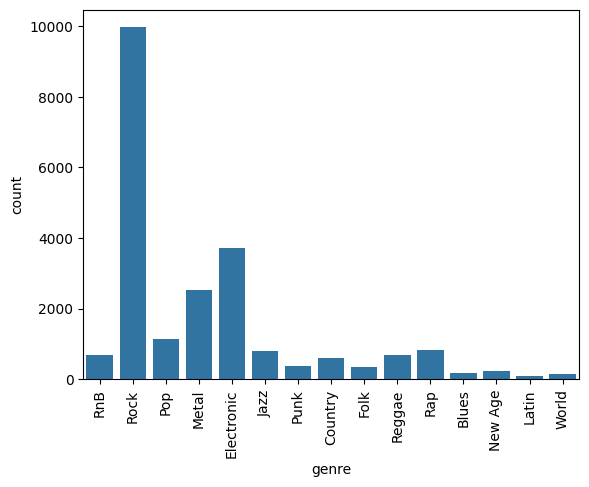

In [27]:
# Countplot of `genre`

sns.countplot(df_songs, x="genre")
plt.xticks(rotation=90)
plt.show();

Let's check if we can try to fill in `genre` using `tags`.

In [28]:
# Group of `genre`

genre_group = df_songs.groupby("genre")
genre_group[["genre", "tags"]].sample(3)

genre                                               tags
23837       Blues                                              blues
1953        Blues     rock, alternative, alternative_rock, hard_rock
24004       Blues               rock, folk, singer_songwriter, blues
42574     Country  rock, pop, female_vocalists, singer_songwriter...
43292     Country                                 country, grindcore
44408     Country                     rock, classic_rock, blues_rock
4578   Electronic    progressive_rock, progressive_metal, doom_metal
36862  Electronic                        electronic, electro, french
38933  Electronic                 electronic, ambient, chillout, idm
5751         Folk  indie, experimental, folk, singer_songwriter, ...
23658        Folk                              folk, blues, acoustic
3664         Folk  electronic, alternative, female_vocalists, exp...
7080         Jazz              female_vocalists, jazz, blues, french
9144         Jazz                                               jazz
9442         Jazz                                 jazz, blues, piano
42045       Latin                                                NaN
46524       Latin                                                ska
49332       Latin                                                NaN
18602       Metal     metal, death_metal, progressive_metal, swedish
25123       Metal                                   metal, metalcore
42824       Metal                             death_metal, grindcore
45560     New Age                                   ambient, new_age
45316     New Age                                            new_age
34192     New Age         power_metal, gothic_metal, symphonic_metal
38857         Pop                                                idm
40851         Pop                                       pop, swedish
9920          Pop                       female_vocalists, jazz, soul
20320        Punk               punk, hardcore, punk_rock, post_punk
23389        Punk                                    punk, punk_rock
13504        Punk  punk, hardcore, punk_rock, post_hardcore, screamo
14381         Rap                                  80s, rap, hip_hop
21365         Rap                          pop, chillout, rnb, chill
22128         Rap                                       rap, hip_hop
30812      Reggae                                             reggae
46167      Reggae                                                ska
30160      Reggae                                      reggae, chill
21112         RnB                                     soul, 90s, rnb
6912          RnB  rock, female_vocalists, classic_rock, 70s, pop...
13844         RnB                                   punk, industrial
41435        Rock                                            screamo
48804        Rock                             electronic, industrial
44622        Rock                                  jazz, avant_garde
49487       World                                              blues
49164       World                                              blues
41575       World                         chillout, trip_hop, lounge

We can see that it is not possible to do it as the same `genre` can have different `tags`.

In [29]:
# Songs in the data whose name is not in english

df_songs.loc[df_songs.loc[:, "name"].str.contains("[^\d\w\s.?!':;-_(){},\.#-&/-]")]

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Sushrut\AppData\Local\Temp\ipykernel_46464\4075997660.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_songs.loc[df_songs.loc[:, "name"].str.contains("[^\d\w\s.?!':;-_(){},\.#-&/-]")]


track_id                                               name  \
2455   TRBGIZH128F4252D9E                                          2 + 2 = 5   
4463   TRGHMRU128F1478067                     I Put The "Metro" In Metronome   
6870   TRGIILN12903CE46BB                                                1+1   
7902   TRZMLSV128F9305C8C                                          B********   
7974   TRFRAEO128F4279C87                                    F**k the System   
10722  TRODWHD128F92FD8BA                                             4 + 20   
13127  TRLMIXB128EF3435DD                                              M+M's   
14454  TRKEIVB128F930A597                            Nuthin' But a "G" Thang   
17862  TRBZLOG12903CB78FD     I Belong To You [+Mon Coeur S'Ouvre A Ta Voix]   
22541  TRYVOPZ128F4254176                                                 £4   
22689  TRREPNS128F932937F                         This S*it Will Fcuk You Up   
22927  TRFQDNW128F92E6646    My Heart Will Go On (Love Theme from "Titanic")   
23064  TRALZTM128F92EC5F0  Because You Loved Me (Theme from "Up Close and...   
24746  TRIEODF128E0788AA5                                   Appels + Oranjes   
25734  TRAVISG128F932B3FB                                     艶かしき安息、躊躇いに微笑み   
25743  TRDNGBD128F9322F40                                        孤独に死す、故に孤独。   
25759  TRYYXFI128F932D175                                          凱歌、沈黙が眠る頃   
25774  TRAUFHP128F933E28F                                       Nefi + Girly   
25821  TRDEOIN128F932D171                                           我、闇とて･･･   
27004  TRECOYH128F421C4F0                                The Devil, You + Me   
28461  TRTHZPA128F92EB816              Barbarism Begins At Home (7" Version)   
28653  TRLWWIM128E0789BA2                                               100°   
29955  TREZRYL128F426700B                             The Downeaster "Alexa"   
32167  TRFPAQP128F425FE22                                           Beauty*2   
32296  TRBPQSK128F9308FBC                                           U + Me =   
34955  TRNPJTP128F14A770D                                             (*Fin)   
37610  TRPOEHO128E0788AB6                             Raindrops + Sunshowers   
38908  TRTYSJW128F932E744                    2 + 2 = 5 (Live At Earls Court)   
39291  TRHNVOG128F1487163                     Papua New Guinea (12" Version)   
40158  TRTOHKH12903CB243F                       Outro: "Communion" (excerpt)   
40180  TRMYIPB128F148A1AB                                         Puke + Cry   
40509  TRTQIYK128F92F89E8                               Surf Solar (7" Edit)   
40685  TRHWYBY128F92F5F8B                                           F**k You   
41935  TRSHCCB128F92F77D9                            A "DC" Christmas Medley   
48105  TRPJKNS128F428A861                                            1*15*96   
48715  TRBFFHT128E078EC43                   What The F**k Is Wrong With You?   
48841  TRAODBZ128F930772A                                          Hit + Run   
49041  TRYYFBB12903CC5404                                     F*** you bitch   
49434  TRZCMJX128F4273317                                 ¿Dónde Estabas Tú?   

                             artist  \
2455                      Radiohead   
4463        Cute Is What We Aim For   
6870                        Beyoncé   
7902                      Rammstein   
7974               System of a Down   
10722  Crosby, Stills, Nash & Young   
13127                     blink-182   
14454                       Dr. Dre   
17862                          Muse   
22541            These New Puritans   
22689                   Combichrist   
22927                   Céline Dion   
23064                   Céline Dion   
24746         The Smashing Pumpkins   
25734                   DIR EN GREY   
25743                   DIR EN GREY   
25759                   DIR EN GREY   
25774                   Asobi Seksu   
25821                   DIR EN GREY   
27004                   The Notwist 

In [30]:
len(df_songs.loc[df_songs.loc[:, "name"].str.contains("[^\d\w\s.?!':;-_(){},\.#-&/-]")])

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Sushrut\AppData\Local\Temp\ipykernel_46464\3943149733.py:1: SyntaxWarning: invalid escape sequence '\d'
  len(df_songs.loc[df_songs.loc[:, "name"].str.contains("[^\d\w\s.?!':;-_(){},\.#-&/-]")])


39

In [31]:
# Songs in the data whose artist name is not in english

df_songs.loc[df_songs.loc[:, "artist"].str.contains("[^\d\w\s.?!':;-_\(\)\{\},\.#-+&\/\-\"]")]

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Sushrut\AppData\Local\Temp\ipykernel_46464\400513440.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_songs.loc[df_songs.loc[:, "artist"].str.contains("[^\d\w\s.?!':;-_\(\)\{\},\.#-+&\/\-\"]")]


track_id                    name                 artist  \
25657  TRUOKRP128F9306B97         DAYBREAK'S BELL          L'Arc~en~Ciel   
25688  TRYYZGB128F9306B92  MY HEART DRAWS A DREAM          L'Arc~en~Ciel   
25696  TRYAFFS128F425E71A          Seventh Heaven          L'Arc~en~Ciel   
25704  TRZBUIY128F9306B9D              Hurry Xmas          L'Arc~en~Ciel   
25715  TRDLCHM128F427F235    Spirit dreams inside          L'Arc~en~Ciel   
25763  TRKTCEP128F9306B91             Pretty girl          L'Arc~en~Ciel   
25788  TRMDISG128EF341CBC               Lover Boy          L'Arc~en~Ciel   
25790  TRHNIIF128F42884A7                   TRUST          L'Arc~en~Ciel   
25799  TRMZMPL128F1490F27                    Niji          L'Arc~en~Ciel   
25800  TRANWBU128F42717D4                 My Dear          L'Arc~en~Ciel   
25801  TRMIJFJ128F92E4322            Feeling Fine          L'Arc~en~Ciel   
25806  TRBDBAO128F9306B96        ALONE EN LA VIDA          L'Arc~en~Ciel   
25818  TRFEIRU128F9306B95                  spiral          L'Arc~en~Ciel   
25819  TRJLZNV128F9306B9A          THE BLACK ROSE          L'Arc~en~Ciel   
25849  TRYKCOS128F9325E0B                    fate          L'Arc~en~Ciel   
25869  TRUDYAW12903C93A7F                   SHINE          L'Arc~en~Ciel   
25888  TRIQSUH128F92D764C            Perfect Blue          L'Arc~en~Ciel   
25928  TRZCMQL128F1455265                    Dune          L'Arc~en~Ciel   
25951  TREMQTE128F422B68B               Fare Well          L'Arc~en~Ciel   
31918  TRABBEX128F9322F79                  Twelve      ¡Forward, Russia!   
37226  TRKNDSE128F9323892               Pirouette  ::M∆DE::IN::HEIGHTS::   
43615  TRFNXGY128F9344550           Promised land          L'Arc~en~Ciel   
43637  TRUKJBV128F9306B93               Sunadokei          L'Arc~en~Ciel   
43657  TREJKIJ128F9306B9C         Yuki no Ashiato          L'Arc~en~Ciel   

                                     spotify_preview_url  \
25657  https://p.scdn.co/mp3-preview/df8245c276f306fa...   
25688  https://p.scdn.co/mp3-preview/e36b38babea5c5c3...   
25696  https://p.scdn.co/mp3-preview/af4fa3d1940c5420...   
25704  https://p.scdn.co/mp3-preview/0d4cd8242d963726...   
25715  https://p.scdn.co/mp3-preview/62f25db32c0542e3...   
25763  https://p.scdn.co/mp3-preview/0419eed98d7fa65f...   
25788  https://p.scdn.co/mp3-preview/e5a58cc1b088e57f...   
25790  https://p.scdn.co/mp3-preview/5f6f268deeb2a772...   
25799  https://p.scdn.co/mp3-preview/bdd6af23ab57c0d6...   
25800  https://p.scdn.co/mp3-preview/7db879fcb917a173...   
25801  https://p.scdn.co/mp3-preview/0328f852ea690993...   
25806  https://p.scdn.co/mp3-preview/51e55caab6f0111e...   
25818  https://p.scdn.co/mp3-preview/70e93bbb53ff4023...   
25819  https://p.scdn.co/mp3-preview/b16211abc05a184c...   
25849  https://p.scdn.co/mp3-preview/a7e78f109d2108c9...   
25869  https://p.scdn.co/mp3-preview/23a694f313c9d6c1...   
25888  https://p.scdn.co/mp3-preview/b3435b5701366df2...   
25928  https://p.scdn.co/mp3-preview/a01cf785472a889c...   
25951  https://p.scdn.co/mp3-preview/fdce1f7797ce5758...   
31918  https://p.scdn.co/mp3-preview/9a9a40eb835f3e18...   
37226  https://p.scdn.co/mp3-preview/97028fa42edd3f70...   
43615  https://p.scdn.co/mp3-preview/02cc78a0cd41c0c7...   
43637  https://p.scdn.co/mp3-preview/598d4acb422de5d2...   
43657  https://p.scdn.co/mp3-preview/094f5fb934280704...   

                   spotify_id                          tags  genre  year  \
25657  0f6N93Iqa1jIGY87ckKe8h               japanese, j_pop    NaN  2007   
25688  0K1VcVuws8cBEOS8bb8Svo               japanese, j_pop    NaN  2007   
25696  0vc0kp9kYeqLCoDOKFYESL               japanese, j_pop    NaN  2007   
25704  0NMWlIwjGldOgbABHTYx82               japanese, j_pop   Rock  2007   
25715  0hyTPlLk6MWOGiKFstN0S2                      japanese    NaN  2002   
25763  0QUESFm42vSLGffjwud4jl               japanese, j_pop   Rock  2007   
25788  69Gd7FRSCuB4X7D7gDOdhz                      japanese    NaN  2004   
25790  

In [32]:
len(df_songs.loc[df_songs.loc[:, "artist"].str.contains("[^\d\w\s.?!':;-_\(\)\{\},\.#-+&\/\-\"]")])

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Sushrut\AppData\Local\Temp\ipykernel_46464\3488909380.py:1: SyntaxWarning: invalid escape sequence '\d'
  len(df_songs.loc[df_songs.loc[:, "artist"].str.contains("[^\d\w\s.?!':;-_\(\)\{\},\.#-+&\/\-\"]")])


24

In [33]:
df_songs["tags"]

0        rock, alternative, indie, alternative_rock, in...
1        rock, alternative, indie, pop, alternative_roc...
2         rock, alternative, alternative_rock, 90s, grunge
3        rock, alternative, indie, alternative_rock, in...
4        rock, alternative, indie, alternative_rock, in...
                               ...                        
50678                                                  NaN
50679              rock, alternative_rock, japanese, cover
50680                      metal, metalcore, post_hardcore
50681                                                  NaN
50682                                       rock, japanese
Name: tags, Length: 50674, dtype: object

In [34]:
df_songs["tags"][0]

'rock, alternative, indie, alternative_rock, indie_rock, 00s'

In [35]:
all_tags = []

for tags in df_songs["tags"].dropna().str.replace(" ", "").str.split(","):
    all_tags.extend(tags)

In [36]:
print(f"There are {len(set(all_tags))} unique tags.")

There are 100 unique tags.


In [37]:
print(set(all_tags))

{'blues_rock', 'death_metal', 'house', 'pop', '90s', 'new_wave', 'beautiful', 'british', 'j_pop', 'swedish', 'gothic', 'hip_hop', 'noise', 'country', 'power_metal', 'heavy_metal', 'soundtrack', 'polish', 'doom_metal', 'instrumental', 'hardcore', 'black_metal', 'mellow', 'rnb', 'punk_rock', 'avant_garde', 'guitar', 'female_vocalists', 'piano', 'love', 'cover', 'dark_ambient', 'ska', 'experimental', 'alternative', 'post_punk', 'classic_rock', 'lounge', 'male_vocalists', 'american', 'russian', 'progressive_rock', 'chill', 'classical', '80s', 'metal', 'psychedelic_rock', 'idm', 'ambient', 'electronic', 'jazz', 'post_rock', 'reggae', 'japanese', 'pop_rock', 'trip_hop', 'emo', 'downtempo', 'singer_songwriter', 'german', 'nu_metal', 'gothic_metal', 'folk', 'indie', 'hard_rock', 'psychedelic', 'acoustic', 'new_age', 'progressive_metal', 'melodic_death_metal', 'grindcore', 'thrash_metal', 'blues', 'alternative_rock', 'funk', '60s', 'soul', 'symphonic_metal', 'metalcore', 'indie_rock', 'post_har

In [38]:
df_songs.loc[:, "tags"].dropna().str.split(",")

0        [rock,  alternative,  indie,  alternative_rock...
1        [rock,  alternative,  indie,  pop,  alternativ...
2        [rock,  alternative,  alternative_rock,  90s, ...
3        [rock,  alternative,  indie,  alternative_rock...
4        [rock,  alternative,  indie,  alternative_rock...
                               ...                        
50675                      [electronic,  indie_pop,  love]
50677                       [alternative_rock,  punk_rock]
50679         [rock,  alternative_rock,  japanese,  cover]
50680                  [metal,  metalcore,  post_hardcore]
50682                                    [rock,  japanese]
Name: tags, Length: 49548, dtype: object

In [39]:
df_songs.loc[:, "tags"].dropna().str.split(",").explode()

0                     rock
0              alternative
0                    indie
0         alternative_rock
0               indie_rock
               ...        
50680                metal
50680            metalcore
50680        post_hardcore
50682                 rock
50682             japanese
Name: tags, Length: 185274, dtype: object

In [40]:
# Unique tags in the data

df_songs.loc[:, "tags"].dropna().str.split(",").explode().str.strip().unique()

array(['rock', 'alternative', 'indie', 'alternative_rock', 'indie_rock',
       '00s', 'pop', 'british', '90s', 'love', 'britpop', 'grunge',
       'piano', 'beautiful', 'mellow', 'chillout', 'funk', 'electronic',
       'dance', 'hip_hop', 'trip_hop', 'metal', 'hard_rock', 'nu_metal',
       'progressive_rock', 'classic_rock', '80s', '70s', 'experimental',
       'soundtrack', 'female_vocalists', 'heavy_metal', 'rap', '60s',
       'post_punk', 'pop_rock', 'punk', 'punk_rock', 'acoustic', 'emo',
       'new_wave', 'chill', 'indie_pop', 'gothic_metal', 'gothic',
       'thrash_metal', 'folk', 'singer_songwriter', 'country', 'cover',
       'blues_rock', 'psychedelic', 'psychedelic_rock', 'guitar',
       'american', 'ska', 'ambient', 'blues', 'oldies', 'french',
       'male_vocalists', 'reggae', 'instrumental', 'jazz', 'avant_garde',
       'industrial', 'german', 'synthpop', 'hardcore', 'metalcore',
       'screamo', 'post_rock', 'swedish', 'doom_metal', 'power_metal',
       'rnb', 

## Integer-based columns

In [41]:
integer_cols = df_songs.select_dtypes(include="int").columns
integer_cols

Index(['year', 'duration_ms', 'key', 'mode', 'time_signature'], dtype='object')

In [42]:
df_songs[integer_cols]

year  duration_ms  key  mode  time_signature
0      2004       222200    1     1               4
1      2006       258613    2     1               4
2      1991       218920    4     0               4
3      2004       237026    9     1               4
4      2008       238640    7     1               4
...     ...          ...  ...   ...             ...
50678  2008       273440    6     0               4
50679  2004       275133    0     1               4
50680  2014       254826   10     0               4
50681  2008       243293    4     0               4
50682  2008       131960    8     1               4

[50674 rows x 5 columns]

In [43]:
df_songs[integer_cols].describe()

year   duration_ms           key          mode  time_signature
count  50674.000000  5.067400e+04  50674.000000  50674.000000    50674.000000
mean    2004.017109  2.511536e+05      5.312507      0.631073        3.898153
std        8.860497  1.075892e+05      3.567967      0.482519        0.419686
min     1900.000000  1.439000e+03      0.000000      0.000000        0.000000
25%     2001.000000  1.927330e+05      2.000000      0.000000        4.000000
50%     2006.000000  2.349330e+05      5.000000      1.000000        4.000000
75%     2009.000000  2.881828e+05      9.000000      1.000000        4.000000
max     2022.000000  3.816373e+06     11.000000      1.000000        5.000000

**Observations:**
* Most of the songs in the data seem to be after the year 2006.
* Most of the songs are in the time signature of 4.

In [44]:
for col in integer_cols:
    print(f"The column '{col}' has {df_songs[col].nunique()} unique values.")

The column 'year' has 75 unique values.
The column 'duration_ms' has 24202 unique values.
The column 'key' has 12 unique values.
The column 'mode' has 2 unique values.
The column 'time_signature' has 5 unique values.


In [45]:
for col in integer_cols:
    print(f"The top category in the column '{col}' is:")
    print(f"{df_songs[col].value_counts().head(1)}", end="\n\n")

The top category in the column 'year' is:
year
2007    4221
Name: count, dtype: int64

The top category in the column 'duration_ms' is:
duration_ms
214666    21
Name: count, dtype: int64

The top category in the column 'key' is:
key
9    5907
Name: count, dtype: int64

The top category in the column 'mode' is:
mode
1    31979
Name: count, dtype: int64

The top category in the column 'time_signature' is:
time_signature
4    44981
Name: count, dtype: int64



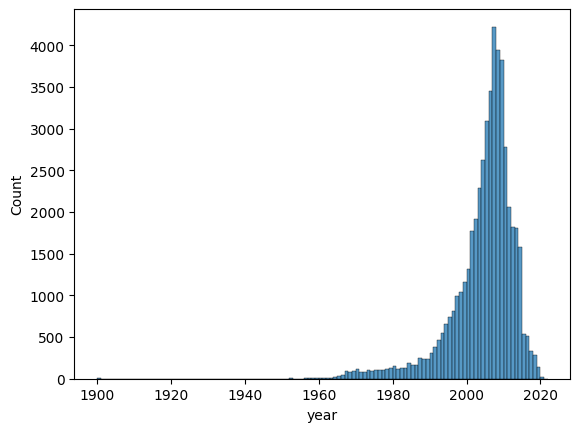

In [46]:
# Number of songs per year

sns.histplot(df_songs, x="year", bins=df_songs["year"].max() - df_songs["year"].min(), stat="count")
plt.show();

**Observations:**
* We can see that most of the songs are from the 2000's.

In [47]:
# Percentage of songs in each key

df_songs["key"].value_counts(normalize=True)

key
9     0.116569
7     0.115858
2     0.115464
0     0.113332
1     0.089198
4     0.085586
11    0.080850
5     0.072069
6     0.063839
10    0.059656
8     0.059577
3     0.028003
Name: proportion, dtype: float64

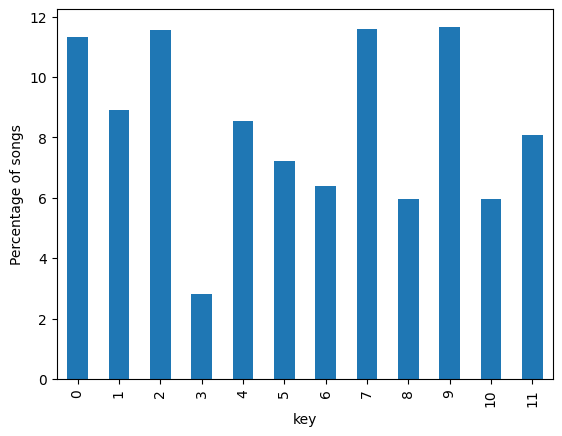

In [48]:
# Percentage of songs in each key

df_songs["key"].value_counts(normalize=True).mul(100).sort_index().plot(kind="bar", ylabel="Percentage of songs");

**Observations:**
* The key distribution seems random. However, the least number of songs are in the key `3`, i.e., D#.

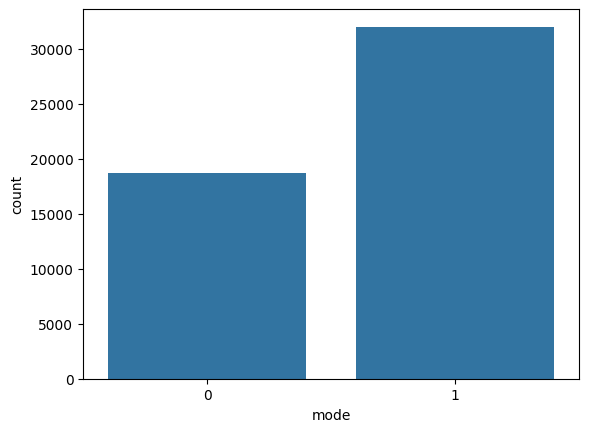

In [49]:
# Countplot for `mode`

sns.countplot(df_songs, x="mode")
plt.show();

**Observations:**
* Most of the songs are on a major scale.

In [50]:
# Unique values of `time_signature`

df_songs["time_signature"].unique()

array([4, 3, 5, 1, 0])

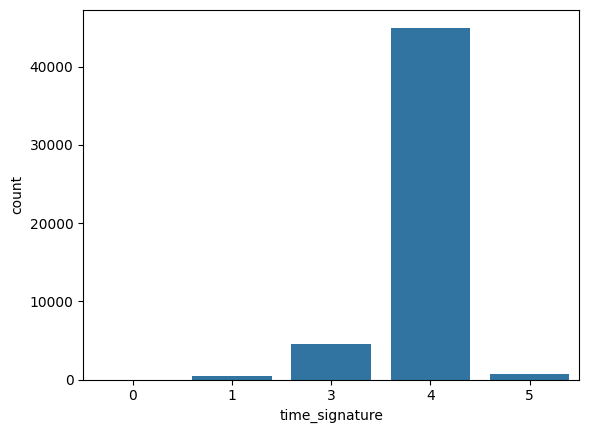

In [51]:
# Countplot of `time_signature`

sns.countplot(df_songs, x="time_signature")
plt.show();

**Observations:**
* Most songs have a time signature of 4.
* A very tiny fraction of songs have a time signature of 0, 1, and 5.

In [52]:
df_songs["time_signature"].value_counts(normalize=True)

time_signature
4    0.887654
3    0.088803
5    0.014445
1    0.008900
0    0.000197
Name: proportion, dtype: float64

In [53]:
# Statistical summary of duration

df_songs["duration_ms"].describe()

count    5.067400e+04
mean     2.511536e+05
std      1.075892e+05
min      1.439000e+03
25%      1.927330e+05
50%      2.349330e+05
75%      2.881828e+05
max      3.816373e+06
Name: duration_ms, dtype: float64

In [54]:
df_songs["duration_mins"].describe()

count    50674.000000
mean         4.185893
std          1.793154
min          0.023983
25%          3.212217
50%          3.915550
75%          4.803046
max         63.606217
Name: duration_mins, dtype: float64

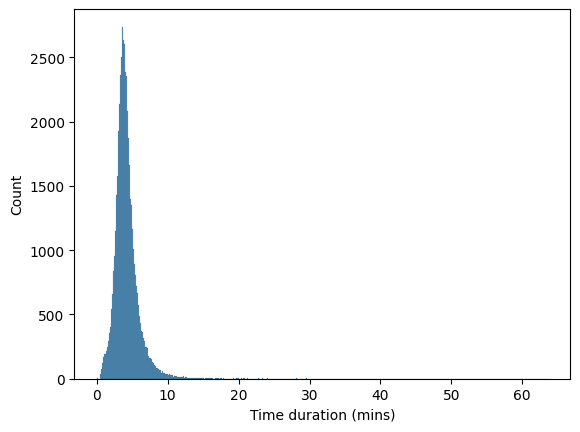

In [55]:
# Histogram of duration

sns.histplot(df_songs["duration_mins"])
plt.xlabel("Time duration (mins)")
plt.show();

**Observations:**
* Vast majority of songs are between 1 to 10 minutes long.
* Duration has a long right tail, i.e., it is considerably right-skewed.
* This means that it has many outliers.

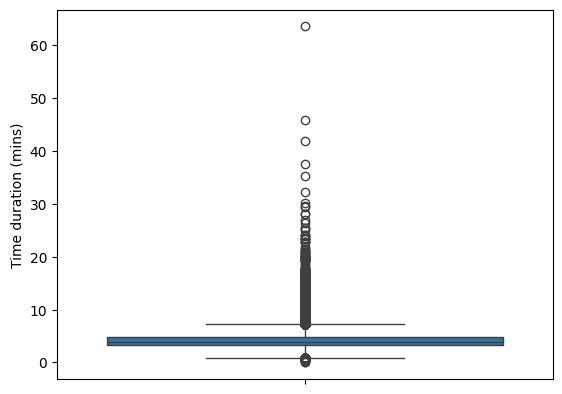

In [56]:
# Boxplot of duration

sns.boxplot(df_songs["duration_mins"])
plt.ylabel("Time duration (mins)")
plt.show();

We can see that there is one song which is longer than 60 mins. Let us check it out.

In [57]:
df_songs[df_songs["duration_mins"] > 60]

track_id        name artist  \
25337  TRDAOJL128F932C383  Dopesmoker  Sleep   

                                     spotify_preview_url  \
25337  https://p.scdn.co/mp3-preview/04be49c679bbabfa...   

                   spotify_id                     tags genre  year  \
25337  1vhvheW4R0KbK6Kr3NFplW  psychedelic, doom_metal   NaN  2003   

       duration_ms  danceability  energy  key  loudness  mode  speechiness  \
25337      3816373          0.16   0.572    5    -6.949     1       0.0321   

       acousticness  instrumentalness  liveness  valence   tempo  \
25337       0.00367             0.745    0.0952   0.0932  96.926   

       time_signature  duration_mins  
25337               4      63.606217

## Continuous columns

In [58]:
continuous_cols = df_songs.select_dtypes(include="float").columns
continuous_cols

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins'],
      dtype='object')

In [59]:
def numerical_analysis(df, columns):
    for column in columns:
        print(f"Numerical analysis for '{column}':", end="\n\n")
        print("Statistical summary:")
        print(df[column].describe(), end="\n\n")

        fig = plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[column])
        plt.title(f"Histogram of '{column}'")

        plt.subplot(1, 2, 2)
        sns.boxplot(df[column])
        plt.title(f"Boxplot of '{column}'")
        plt.show();

        print("#" * 150, end="\n\n")

    print("Pairplot")
    sns.pairplot(df[columns])
    plt.show();

Numerical analysis for 'danceability':

Statistical summary:
count    50674.000000
mean         0.493522
std          0.178833
min          0.000000
25%          0.364000
50%          0.497000
75%          0.621000
max          0.986000
Name: danceability, dtype: float64



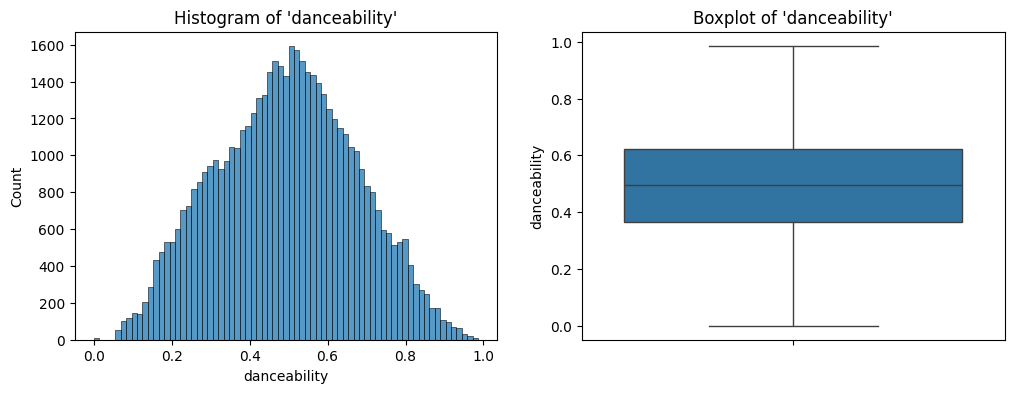

######################################################################################################################################################

Numerical analysis for 'energy':

Statistical summary:
count    50674.000000
mean         0.686507
std          0.251803
min          0.000000
25%          0.514000
50%          0.744000
75%          0.905000
max          1.000000
Name: energy, dtype: float64



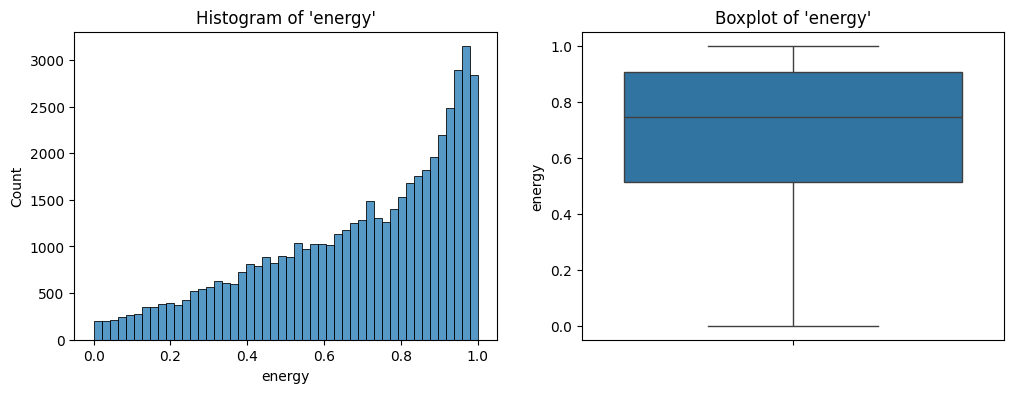

######################################################################################################################################################

Numerical analysis for 'loudness':

Statistical summary:
count    50674.000000
mean        -8.291007
std          4.548359
min        -60.000000
25%        -10.375000
50%         -7.199500
75%         -5.089000
max          3.642000
Name: loudness, dtype: float64



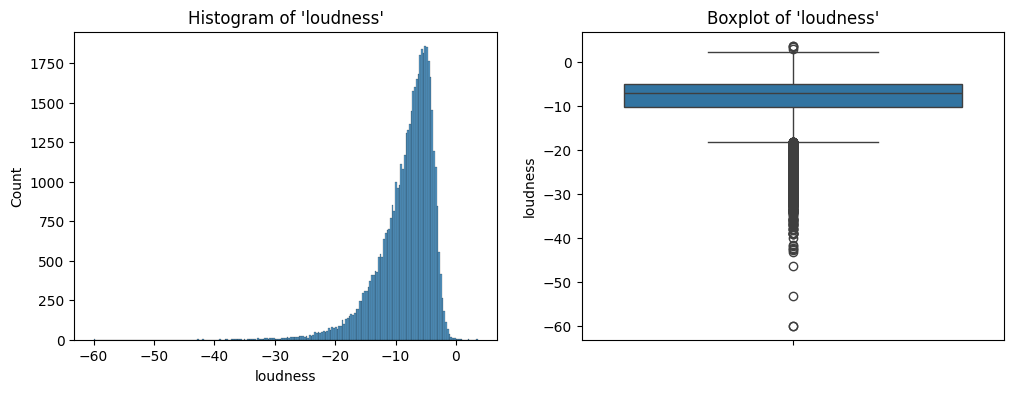

######################################################################################################################################################

Numerical analysis for 'speechiness':

Statistical summary:
count    50674.000000
mean         0.076026
std          0.076012
min          0.000000
25%          0.035200
50%          0.048200
75%          0.083500
max          0.954000
Name: speechiness, dtype: float64



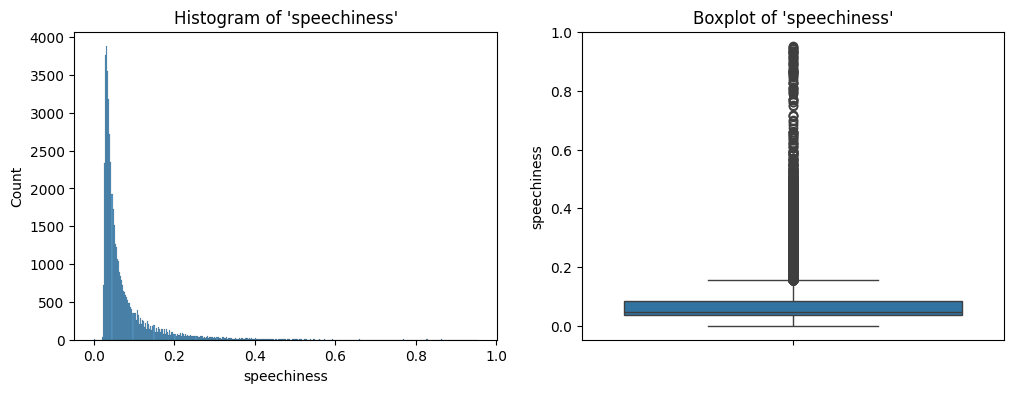

######################################################################################################################################################

Numerical analysis for 'acousticness':

Statistical summary:
count    50674.000000
mean         0.213798
std          0.302839
min          0.000000
25%          0.001400
50%          0.039900
75%          0.340000
max          0.996000
Name: acousticness, dtype: float64



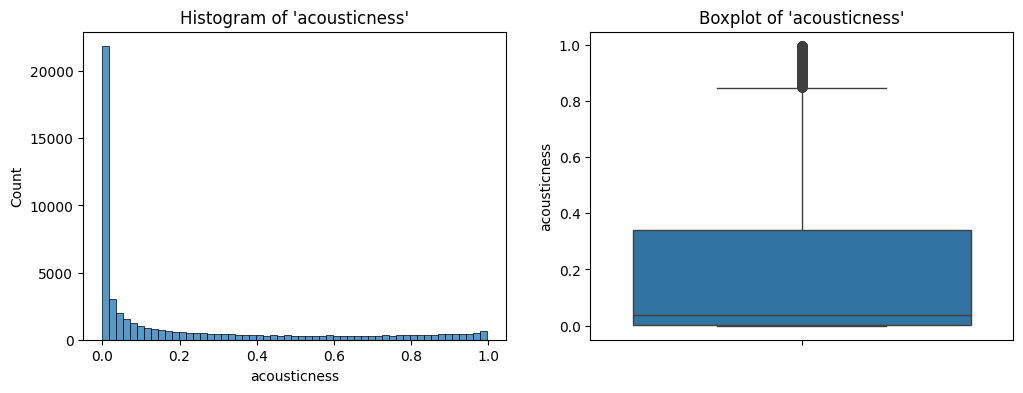

######################################################################################################################################################

Numerical analysis for 'instrumentalness':

Statistical summary:
count    50674.000000
mean         0.225299
std          0.337067
min          0.000000
25%          0.000018
50%          0.005630
75%          0.441000
max          0.999000
Name: instrumentalness, dtype: float64



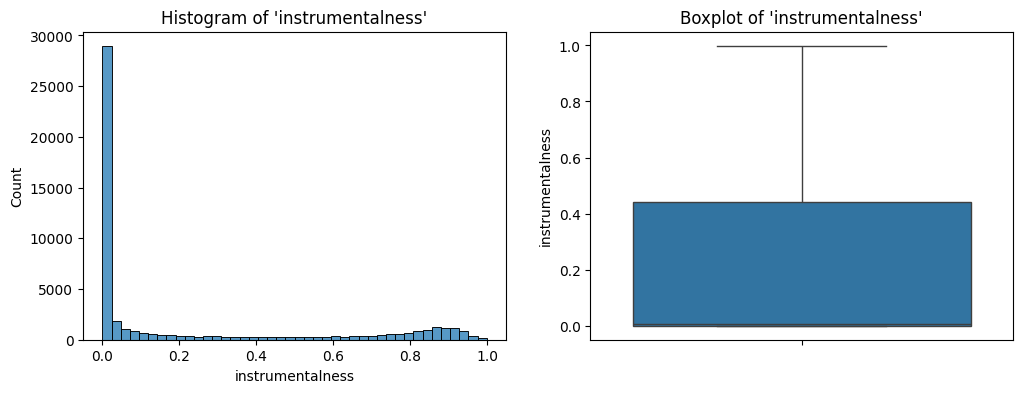

######################################################################################################################################################

Numerical analysis for 'liveness':

Statistical summary:
count    50674.000000
mean         0.215439
std          0.184708
min          0.000000
25%          0.098400
50%          0.138000
75%          0.289000
max          0.999000
Name: liveness, dtype: float64



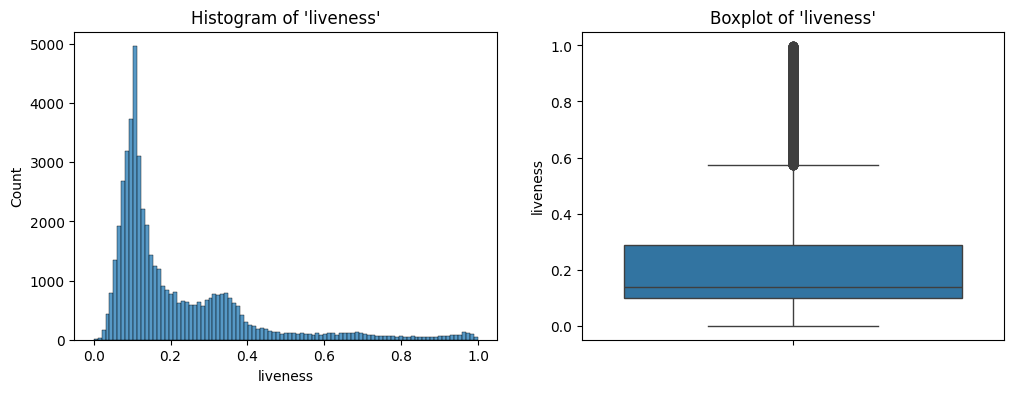

######################################################################################################################################################

Numerical analysis for 'valence':

Statistical summary:
count    50674.000000
mean         0.433113
std          0.258767
min          0.000000
25%          0.214000
50%          0.405000
75%          0.634000
max          0.993000
Name: valence, dtype: float64



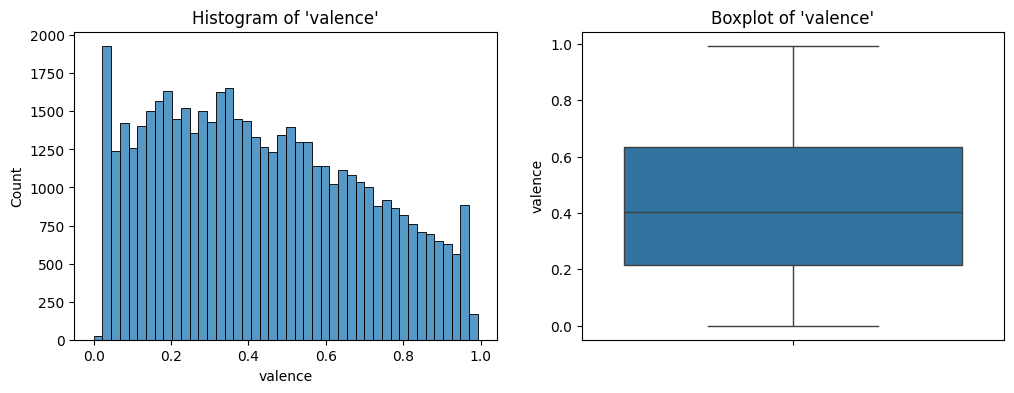

######################################################################################################################################################

Numerical analysis for 'tempo':

Statistical summary:
count    50674.000000
mean       123.508794
std         29.622349
min          0.000000
25%        100.682500
50%        121.989000
75%        141.642250
max        238.895000
Name: tempo, dtype: float64



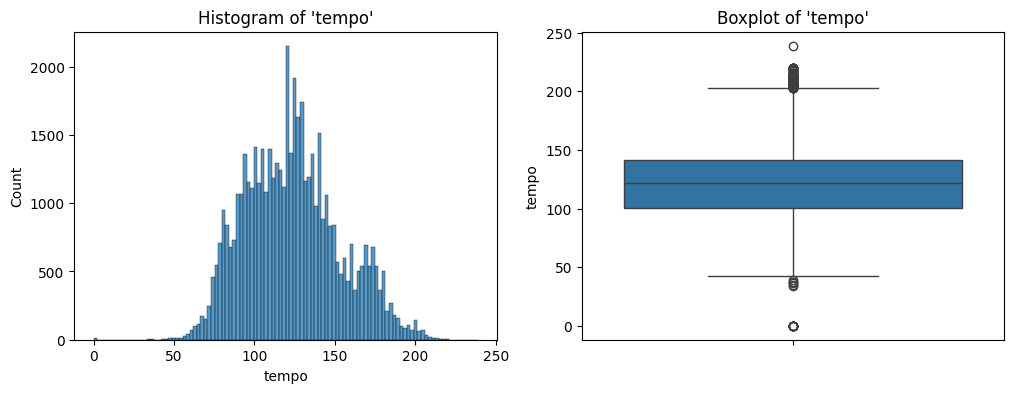

######################################################################################################################################################

Numerical analysis for 'duration_mins':

Statistical summary:
count    50674.000000
mean         4.185893
std          1.793154
min          0.023983
25%          3.212217
50%          3.915550
75%          4.803046
max         63.606217
Name: duration_mins, dtype: float64



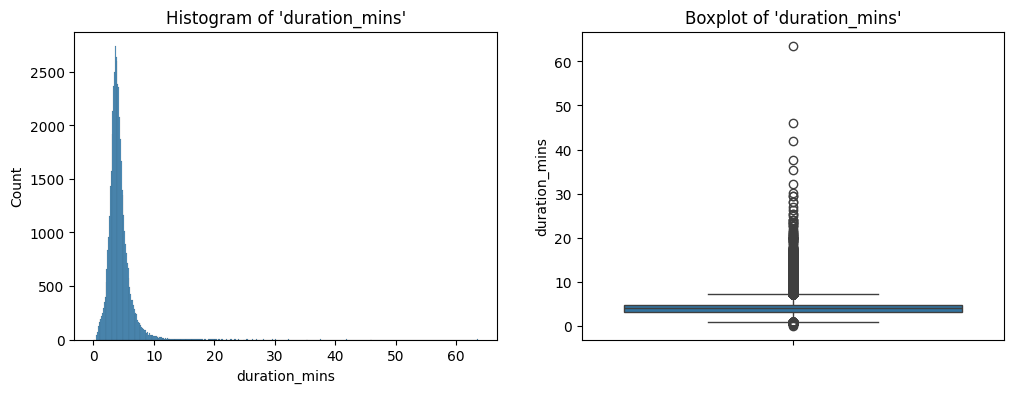

######################################################################################################################################################

Pairplot


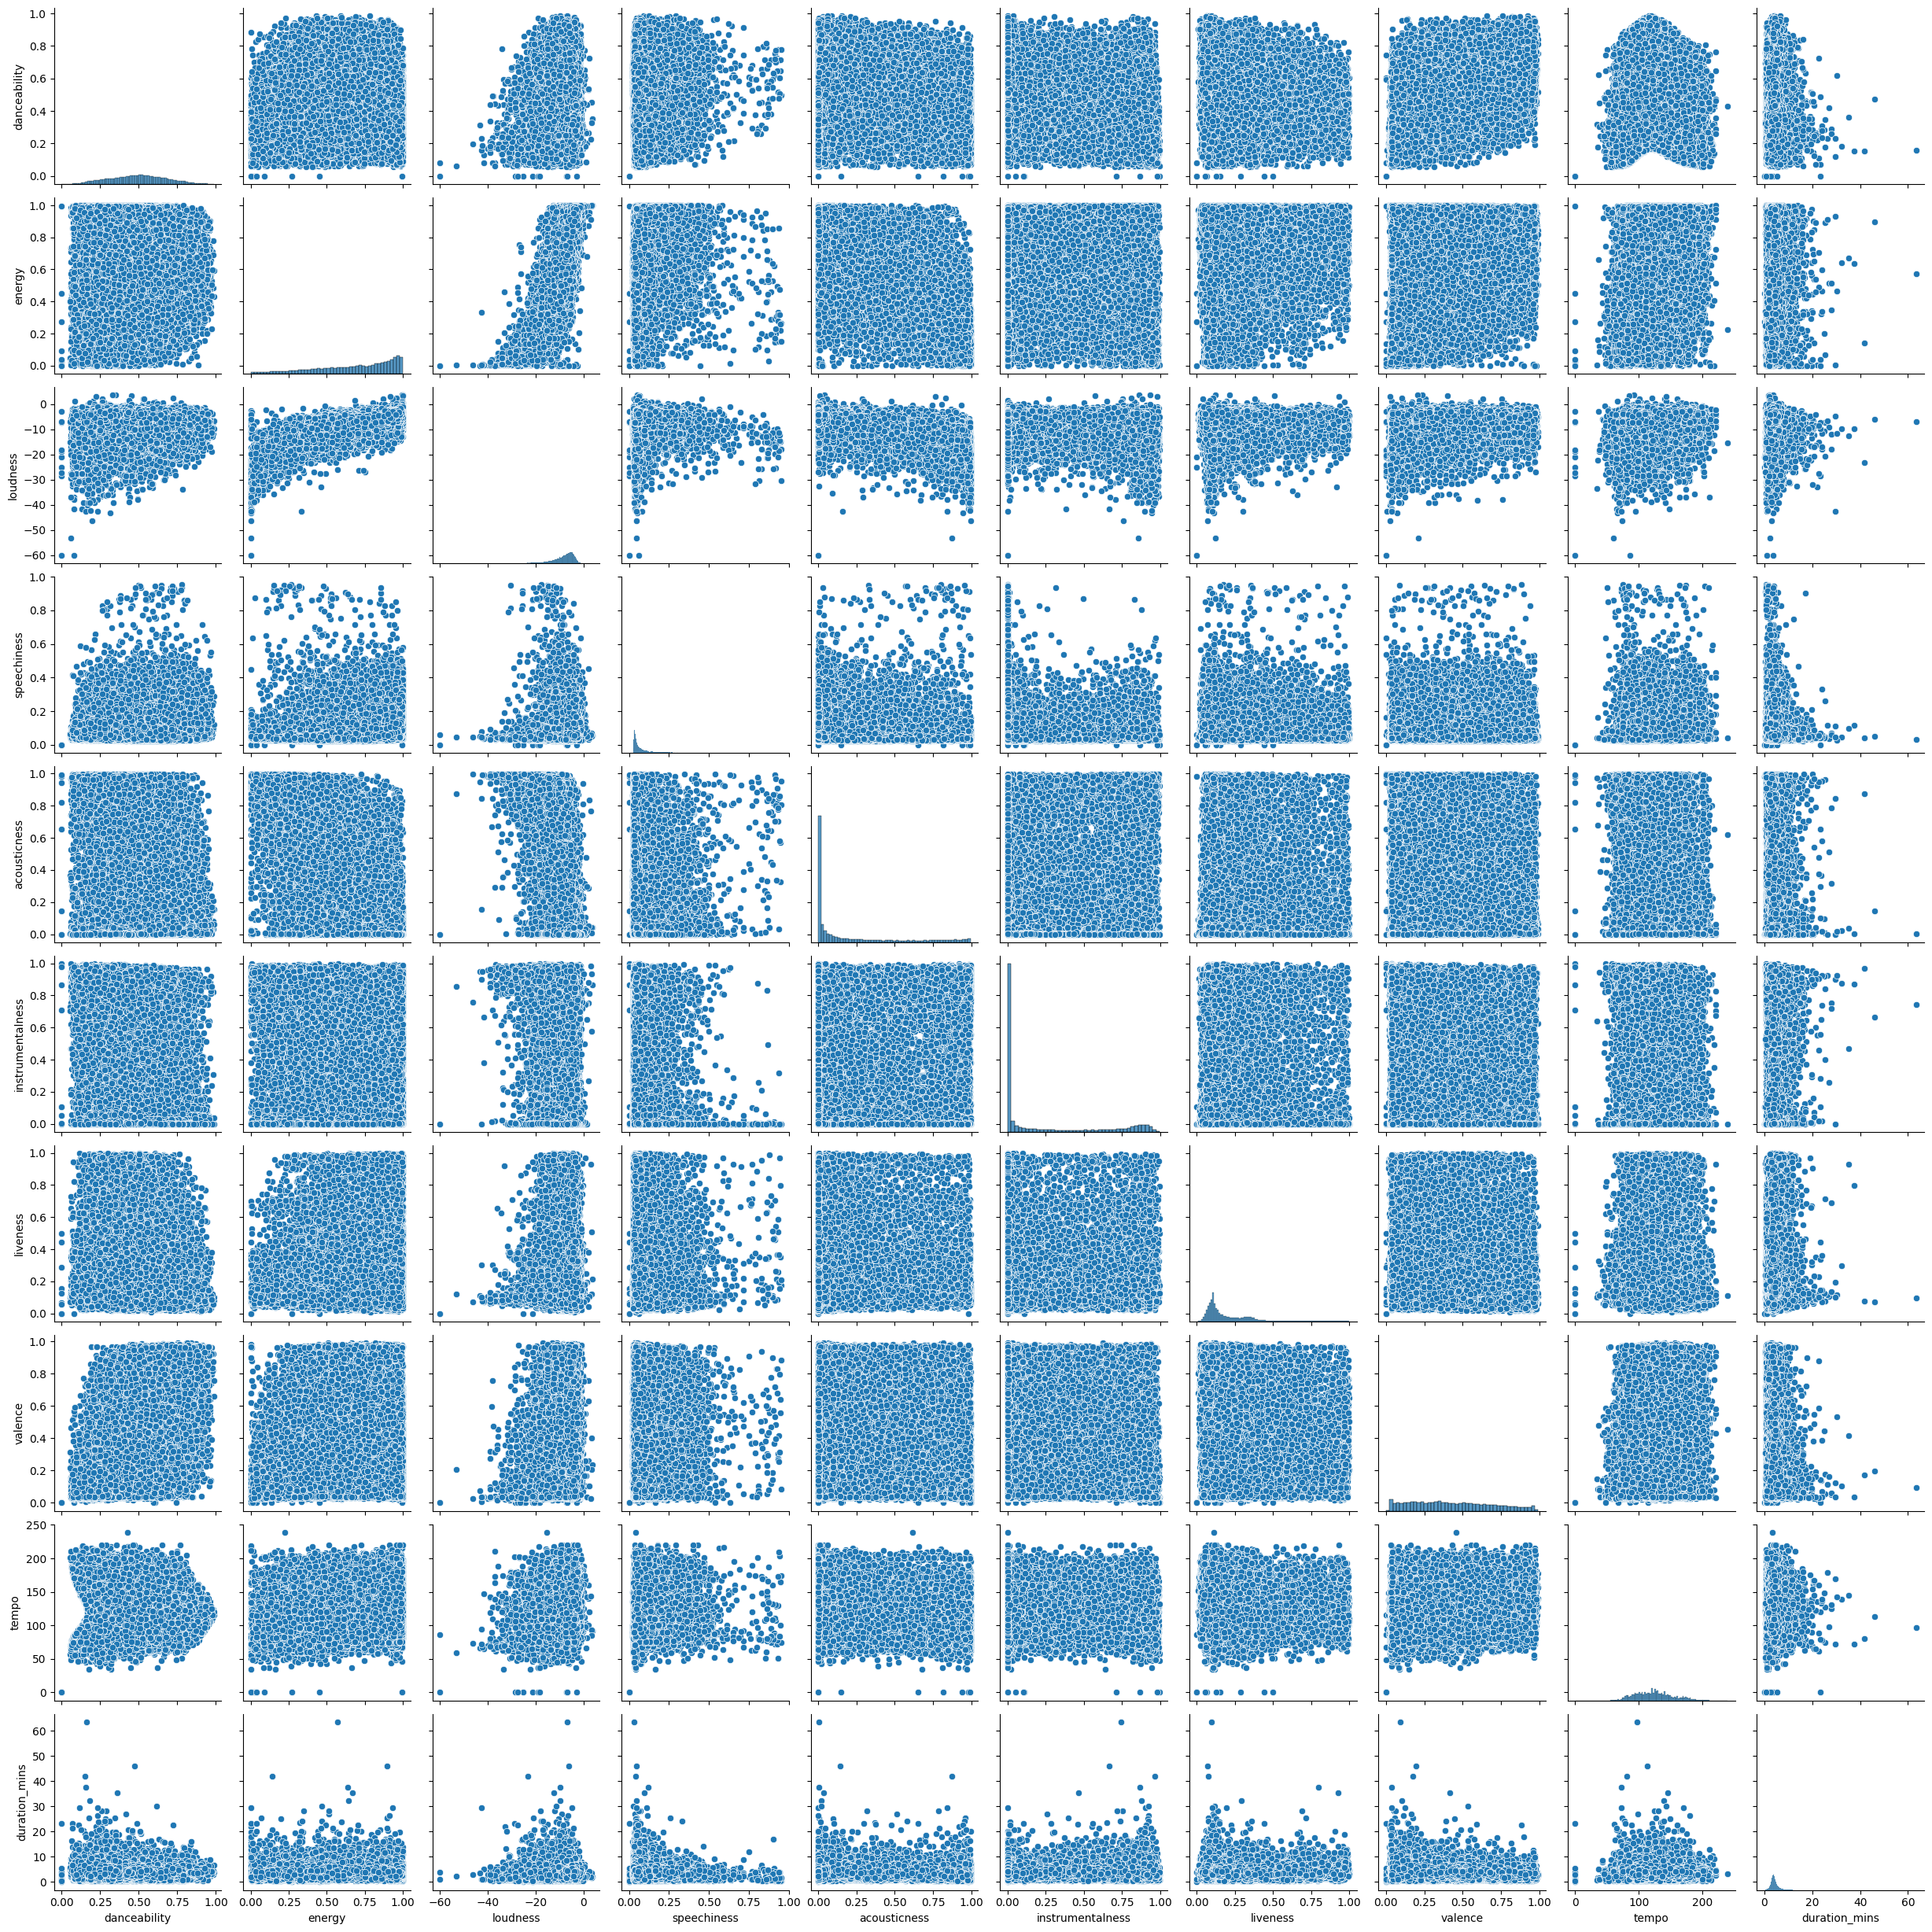

In [60]:
numerical_analysis(df_songs, continuous_cols)

# Users and song data

In [61]:
df_users = pd.read_csv(users_data_path)
df_users.head()

track_id                                   user_id  playcount
0  TRIRLYL128F42539D1  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
1  TRFUPBA128F934F7E1  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
2  TRLQPQJ128F42AA94F  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
3  TRTUCUY128F92E1D24  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
4  TRHDDQG12903CB53EE  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1

In [62]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711301 entries, 0 to 9711300
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   track_id   object
 1   user_id    object
 2   playcount  int64 
dtypes: int64(1), object(2)
memory usage: 222.3+ MB


In [63]:
df_users.shape

(9711301, 3)

In [64]:
# check for duplicates

df_users.duplicated(subset=["track_id", "user_id"]).sum()

np.int64(0)

In [65]:
# check for missing values

df_users.isna().sum()

track_id     0
user_id      0
playcount    0
dtype: int64

In [66]:
# Unique users in the data

df_users["user_id"].nunique()

962037

In [67]:
# Unique songs in the data

df_users["track_id"].nunique()

30459

In [68]:
# Top 10 most played songs in user data

df_users["track_id"].value_counts(sort=True).head(10)

track_id
TRONYHY128F92C9D11    80656
TRUFTBY128F93450B8    39529
TRXWAZC128F9314B3E    30873
TRCPXID128F92D5D3C    30057
TRGCHLH12903CB7352    29708
TROMKCG128F9320C09    28735
TRPFYYL128F92F7144    28412
TRPGPDK12903CCC651    27276
TRWAQOC12903CB84CA    27222
TRAALAH128E078234A    26689
Name: count, dtype: int64

In [69]:
top_10_most_played_songs = df_users["track_id"].value_counts(sort=True).head(10)
top_10_most_played_songs

track_id
TRONYHY128F92C9D11    80656
TRUFTBY128F93450B8    39529
TRXWAZC128F9314B3E    30873
TRCPXID128F92D5D3C    30057
TRGCHLH12903CB7352    29708
TROMKCG128F9320C09    28735
TRPFYYL128F92F7144    28412
TRPGPDK12903CCC651    27276
TRWAQOC12903CB84CA    27222
TRAALAH128E078234A    26689
Name: count, dtype: int64

In [70]:
df_songs["track_id"].isin(top_10_most_played_songs.index.tolist())

0        False
1        False
2        False
3        False
4        False
         ...  
50678    False
50679    False
50680    False
50681    False
50682    False
Name: track_id, Length: 50674, dtype: bool

In [71]:
df_songs.loc[df_songs["track_id"].isin(top_10_most_played_songs.index.tolist()), :]

track_id                   name             artist  \
44     TRAALAH128E078234A  Bitter Sweet Symphony          The Verve   
59     TRPFYYL128F92F7144               Float On       Modest Mouse   
323    TRONYHY128F92C9D11                Revelry      Kings of Leon   
1876   TRXWAZC128F9314B3E     Heartbreak Warfare         John Mayer   
2107   TRUFTBY128F93450B8              Alejandro          Lady Gaga   
2742   TRCPXID128F92D5D3C                   Halo       Depeche Mode   
3168   TRWAQOC12903CB84CA             Sexy Bitch       David Guetta   
19724  TROMKCG128F9320C09               Uprising            Sabaton   
22071  TRPGPDK12903CCC651       Bring Me To Life  Katherine Jenkins   
23220  TRGCHLH12903CB7352    Party In The U.S.A.  The Barden Bellas   

                                     spotify_preview_url  \
44     https://p.scdn.co/mp3-preview/3debe861147de110...   
59     https://p.scdn.co/mp3-preview/0d741d740ea0e449...   
323    https://p.scdn.co/mp3-preview/1c2604b381e6106c...   
1876   https://p.scdn.co/mp3-preview/fec54783c7f773f2...   
2107   https://p.scdn.co/mp3-preview/fc79c08bc9f46cca...   
2742   https://p.scdn.co/mp3-preview/78eac59c0b2a7067...   
3168   https://p.scdn.co/mp3-preview/282100e2282a5d4e...   
19724  https://p.scdn.co/mp3-preview/747932059a000a21...   
22071  https://p.scdn.co/mp3-preview/8f57eebe270df712...   
23220  https://p.scdn.co/mp3-preview/f8c5ff9e6aebca46...   

                   spotify_id  \
44     0jLnevC3Vn34qVWrAa4X6x   
59     1Urf1M52P3R6NYdAOJizoW   
323    039Q3UlFQ6kavVIZHpO4mL   
1876   0naTARZScsZOtx3nlhlq0Y   
2107   0CXHrBetrvDx4PwBar1ZWj   
2742   0Ti7ZxvgWq74Ls56vYP3Ov   
3168   01N6xy2PX9fKVfrA2YOkYd   
19724  09tHVoXbJNZUotndn8pfJr   
22071  0rJ8HF2zsxsWMzirj3YFQR   
23220  0bz2Uy1KE7bNGsGQU9pZrU   

                                                    tags genre  year  \
44     rock, alternative, indie, pop, alternative_roc...   NaN  1999   
59     rock, alternative, indie, alternative_rock, in...  Rock  2004   
323    rock, alternative, indie, alternative_rock, in...  Rock  2008   
1876   rock, alternative, indie, pop, singer_songwrit...  Rock  2010   
2107            electronic, pop, female_vocalists, dance   Pop  2010   
2742   electronic, pop, 80s, british, 90s, new_wave, ...   NaN  1990   
3168                            electronic, dance, house   NaN  2009   
19724                    metal, heavy_metal, power_metal   NaN  2010   
22071                          classical, cover, new_age  Rock  2012   
23220                                  soundtrack, cover   Pop  2012   

       duration_ms  danceability  energy  key  loudness  mode  speechiness  \
44          358333         0.383   0.907    9    -5.409     1       0.0405   
59          208466         0.646   0.893    6    -4.799     1       0.0301   
323         201733         0.437   0.748    4    -6.593     1       0.0689   
1876        263280         0.626   0.572    2    -7.989     1       0.0228   
2107        274800         0.626   0.800   11    -6.777     0       0.0435   
2742        270160         0.672   0.508    3   -12.620     0       0.0310   
3168        193800         0.810   0.595   11    -5.812     0       0.0579   
19724       295640         0.527   0.866    6    -3.763     0       0.0346   
22071       226093         0.429   0.563    4    -8.006     0       0.0300   
23220        63080         0.531   0.360   10    -8.575     0       0.1080   

       acousticness  instrumentalness  liveness  valence    tempo  \
44         0.031300          0.000000    0.3470    0.514  171.052   
59         0.015100          0.000004    0.0892    0.559  100.951   
323        0.196000          0.000328    0.1580    0.383  149.834   
1876       0.197000          0.000497    0.2720    0.297   97.081   
2107       0.000582          0.001140    0.3740    0.353   98.995   
2742       0.052800          0.067100    0.0801    0.741  112.184   
3168       0.067300          0.000764    0.1190    0.813  130.018   
19724 

In [72]:
# Play counts for the top 10 most played songs

df_users.groupby("track_id")["playcount"].agg("sum")

track_id
TRAAAED128E0783FAB     315
TRAAAHD128F42635A5       2
TRAAAQO12903CD8E1C       1
TRAABJS128F9325C99    1831
TRAABXA128F9326351      37
                      ... 
TRZZYMU128E0792400    3107
TRZZZCL128F428BB80      32
TRZZZCN128F9317A03      24
TRZZZHL128F9329CFB     281
TRZZZRJ128F42819AF    1212
Name: playcount, Length: 30459, dtype: int64

In [73]:
df_users.groupby("track_id")["playcount"].agg("sum").sort_values(ascending=False)

track_id
TRONYHY128F92C9D11    527893
TRUFTBY128F93450B8    111615
TRZNAHL128F9327D5A    111596
TRCPXID128F92D5D3C     91461
TRPGPDK12903CCC651     91448
                       ...  
TRDIDXK128F4260B6B         1
TRFROZR128EF3423D0         1
TRXEVVD12903CBFB39         1
TRDIRBW128F427F18E         1
TRFQNSS128F426F2AD         1
Name: playcount, Length: 30459, dtype: int64

In [74]:
df_users.groupby("track_id")["playcount"].agg("sum").sort_values(ascending=False).head(10)

track_id
TRONYHY128F92C9D11    527893
TRUFTBY128F93450B8    111615
TRZNAHL128F9327D5A    111596
TRCPXID128F92D5D3C     91461
TRPGPDK12903CCC651     91448
TRXWAZC128F9314B3E     87745
TROMKCG128F9320C09     87050
TRPFYYL128F92F7144     85079
TRGCHLH12903CB7352     78443
TRAALAH128E078234A     76893
Name: playcount, dtype: int64

In [75]:
top_10_most_played_songs_playcounts = df_users.groupby("track_id")["playcount"].agg("sum").sort_values(ascending=False).head(10)
top_10_most_played_songs_playcounts

track_id
TRONYHY128F92C9D11    527893
TRUFTBY128F93450B8    111615
TRZNAHL128F9327D5A    111596
TRCPXID128F92D5D3C     91461
TRPGPDK12903CCC651     91448
TRXWAZC128F9314B3E     87745
TROMKCG128F9320C09     87050
TRPFYYL128F92F7144     85079
TRGCHLH12903CB7352     78443
TRAALAH128E078234A     76893
Name: playcount, dtype: int64

In [76]:
df_songs.loc[df_songs["track_id"].isin(top_10_most_played_songs_playcounts.index.tolist()), :]

track_id                   name             artist  \
44     TRAALAH128E078234A  Bitter Sweet Symphony          The Verve   
59     TRPFYYL128F92F7144               Float On       Modest Mouse   
323    TRONYHY128F92C9D11                Revelry      Kings of Leon   
1876   TRXWAZC128F9314B3E     Heartbreak Warfare         John Mayer   
2107   TRUFTBY128F93450B8              Alejandro          Lady Gaga   
2742   TRCPXID128F92D5D3C                   Halo       Depeche Mode   
19724  TROMKCG128F9320C09               Uprising            Sabaton   
22071  TRPGPDK12903CCC651       Bring Me To Life  Katherine Jenkins   
23220  TRGCHLH12903CB7352    Party In The U.S.A.  The Barden Bellas   
25264  TRZNAHL128F9327D5A                  Gears         Miss May I   

                                     spotify_preview_url  \
44     https://p.scdn.co/mp3-preview/3debe861147de110...   
59     https://p.scdn.co/mp3-preview/0d741d740ea0e449...   
323    https://p.scdn.co/mp3-preview/1c2604b381e6106c...   
1876   https://p.scdn.co/mp3-preview/fec54783c7f773f2...   
2107   https://p.scdn.co/mp3-preview/fc79c08bc9f46cca...   
2742   https://p.scdn.co/mp3-preview/78eac59c0b2a7067...   
19724  https://p.scdn.co/mp3-preview/747932059a000a21...   
22071  https://p.scdn.co/mp3-preview/8f57eebe270df712...   
23220  https://p.scdn.co/mp3-preview/f8c5ff9e6aebca46...   
25264  https://p.scdn.co/mp3-preview/6a9701b4828b982d...   

                   spotify_id  \
44     0jLnevC3Vn34qVWrAa4X6x   
59     1Urf1M52P3R6NYdAOJizoW   
323    039Q3UlFQ6kavVIZHpO4mL   
1876   0naTARZScsZOtx3nlhlq0Y   
2107   0CXHrBetrvDx4PwBar1ZWj   
2742   0Ti7ZxvgWq74Ls56vYP3Ov   
19724  09tHVoXbJNZUotndn8pfJr   
22071  0rJ8HF2zsxsWMzirj3YFQR   
23220  0bz2Uy1KE7bNGsGQU9pZrU   
25264  3YC9z1sMjAxn5noHpBLBXd   

                                                    tags genre  year  \
44     rock, alternative, indie, pop, alternative_roc...   NaN  1999   
59     rock, alternative, indie, alternative_rock, in...  Rock  2004   
323    rock, alternative, indie, alternative_rock, in...  Rock  2008   
1876   rock, alternative, indie, pop, singer_songwrit...  Rock  2010   
2107            electronic, pop, female_vocalists, dance   Pop  2010   
2742   electronic, pop, 80s, british, 90s, new_wave, ...   NaN  1990   
19724                    metal, heavy_metal, power_metal   NaN  2010   
22071                          classical, cover, new_age  Rock  2012   
23220                                  soundtrack, cover   Pop  2012   
25264                  metalcore, post_hardcore, screamo   NaN  2010   

       duration_ms  danceability  energy  key  loudness  mode  speechiness  \
44          358333         0.383   0.907    9    -5.409     1       0.0405   
59          208466         0.646   0.893    6    -4.799     1       0.0301   
323         201733         0.437   0.748    4    -6.593     1       0.0689   
1876        263280         0.626   0.572    2    -7.989     1       0.0228   
2107        274800         0.626   0.800   11    -6.777     0       0.0435   
2742        270160         0.672   0.508    3   -12.620     0       0.0310   
19724       295640         0.527   0.866    6    -3.763     0       0.0346   
22071       226093         0.429   0.563    4    -8.006     0       0.0300   
23220        63080         0.531   0.360   10    -8.575     0       0.1080   
25264       241466         0.470   0.975    5    -4.479     1       0.1360   

       acousticness  instrumentalness  liveness  valence    tempo  \
44         0.031300          0.000000    0.3470   0.5140  171.052   
59         0.015100          0.000004    0.0892   0.5590  100.951   
323        0.196000          0.000328    0.1580   0.3830  149.834   
1876       0.197000          0.000497    0.2720   0.2970   97.081   
2107       0.000582          0.001140    0.3740   0.3530   98.995   
2742       0.052800          0.067100    0.0801   0.7410  112.184   
19724      0.009910          0.000052    0.1290   0.4280   87.986   
22071 

In [77]:
pd.concat([top_10_most_played_songs, top_10_most_played_songs_playcounts], axis=1)

count  playcount
track_id                              
TRONYHY128F92C9D11  80656.0   527893.0
TRUFTBY128F93450B8  39529.0   111615.0
TRXWAZC128F9314B3E  30873.0    87745.0
TRCPXID128F92D5D3C  30057.0    91461.0
TRGCHLH12903CB7352  29708.0    78443.0
TROMKCG128F9320C09  28735.0    87050.0
TRPFYYL128F92F7144  28412.0    85079.0
TRPGPDK12903CCC651  27276.0    91448.0
TRWAQOC12903CB84CA  27222.0        NaN
TRAALAH128E078234A  26689.0    76893.0
TRZNAHL128F9327D5A      NaN   111596.0

In [78]:
# Top 10 most diverse users

df_users.groupby("user_id")["track_id"].agg("count")

user_id
00000b722001882066dff9d2da8a775658053ea0    1
00001638d6189236866af9bbf309ae6c2347ffdc    1
0000175652312d12576d9e6b84f600caa24c4715    1
00001cf0dce3fb22b0df0f3a1d9cd21e38385372    8
0000267bde1b3a70ea75cf2b2d216cb828e3202b    9
                                           ..
ffffdc6c89988cd6119067769162948eacf8b670    6
ffffe07df4bb5fd929efe42c5728f3a0c1621277    3
fffff3e690fcda840b716ce7249d8935ff3323fc    3
fffff67d54a40927c93d03bd6c816b034b59f087    6
fffff9534445f481b6ab91c345500083d2ce4df1    9
Name: track_id, Length: 962037, dtype: int64

In [79]:
df_users.groupby("user_id")["track_id"].agg("count").sort_values(ascending=False).head(10)

user_id
ec6dfcf19485cb011e0b22637075037aae34cf26    784
4e11f45d732f4861772b2906f81a7d384552ad12    384
726da71c2c2ea119119a7957517fccd028d1be76    376
113255a012b2affeab62607563d03fbdf31b08e7    367
7adec7f006cb09482d36609d205293d8b61f030e    366
fef771ab021c200187a419f5e55311390f850a50    363
8cb51abc6bf8ea29341cb070fe1e1af5e4c3ffcc    362
b4c94d72b15d3c311c10045a58b31f95d9d12785    357
96f7b4f800cafef33eae71a6bc44f7139f63cd7a    356
6d625c6557df84b60d90426c0116138b617b9449    350
Name: track_id, dtype: int64

In [80]:
top_10_most_diverse_users = df_users.groupby("user_id")["track_id"].agg("count").sort_values(ascending=False).head(10)
top_10_most_diverse_users

user_id
ec6dfcf19485cb011e0b22637075037aae34cf26    784
4e11f45d732f4861772b2906f81a7d384552ad12    384
726da71c2c2ea119119a7957517fccd028d1be76    376
113255a012b2affeab62607563d03fbdf31b08e7    367
7adec7f006cb09482d36609d205293d8b61f030e    366
fef771ab021c200187a419f5e55311390f850a50    363
8cb51abc6bf8ea29341cb070fe1e1af5e4c3ffcc    362
b4c94d72b15d3c311c10045a58b31f95d9d12785    357
96f7b4f800cafef33eae71a6bc44f7139f63cd7a    356
6d625c6557df84b60d90426c0116138b617b9449    350
Name: track_id, dtype: int64

In [81]:
# Top 10 most active users

df_users.groupby("user_id")["playcount"].agg("sum").sort_values(ascending=False).head(10)

user_id
1854daf178674bbac9a8ed3d481f95b76676b414    2953
944cdf52364f45b0edd1c972b5a73d3a86b09c6a    2046
6a8a142084a4818c0dcac48bdfb3c39deacf5168    1942
93158e3983ffc8945e25c793d93d6b67d46cae9d    1845
f0b5c784daaa3c7d50acbb3723c7dd649db2b231    1841
6a58f480d522814c087fd3f8c77b3f32bb161f9d    1783
49127655d27dabab3f469bcdd996330fe4f3e210    1743
3fa44653315697f42410a30cb766a4eb102080bb    1639
839223f11c98e0c8017e8ecd6fc7b8706658c966    1608
af3ee32357049dd96231238bd1b019e8142ee6aa    1579
Name: playcount, dtype: int64

In [82]:
top_10_most_active_users = df_users.groupby("user_id")["playcount"].agg("sum").sort_values(ascending=False).head(10)
top_10_most_active_users

user_id
1854daf178674bbac9a8ed3d481f95b76676b414    2953
944cdf52364f45b0edd1c972b5a73d3a86b09c6a    2046
6a8a142084a4818c0dcac48bdfb3c39deacf5168    1942
93158e3983ffc8945e25c793d93d6b67d46cae9d    1845
f0b5c784daaa3c7d50acbb3723c7dd649db2b231    1841
6a58f480d522814c087fd3f8c77b3f32bb161f9d    1783
49127655d27dabab3f469bcdd996330fe4f3e210    1743
3fa44653315697f42410a30cb766a4eb102080bb    1639
839223f11c98e0c8017e8ecd6fc7b8706658c966    1608
af3ee32357049dd96231238bd1b019e8142ee6aa    1579
Name: playcount, dtype: int64

In [83]:
pd.concat([top_10_most_diverse_users, top_10_most_active_users], axis=1)

track_id  playcount
user_id                                                      
ec6dfcf19485cb011e0b22637075037aae34cf26     784.0        NaN
4e11f45d732f4861772b2906f81a7d384552ad12     384.0        NaN
726da71c2c2ea119119a7957517fccd028d1be76     376.0        NaN
113255a012b2affeab62607563d03fbdf31b08e7     367.0        NaN
7adec7f006cb09482d36609d205293d8b61f030e     366.0        NaN
fef771ab021c200187a419f5e55311390f850a50     363.0        NaN
8cb51abc6bf8ea29341cb070fe1e1af5e4c3ffcc     362.0        NaN
b4c94d72b15d3c311c10045a58b31f95d9d12785     357.0        NaN
96f7b4f800cafef33eae71a6bc44f7139f63cd7a     356.0        NaN
6d625c6557df84b60d90426c0116138b617b9449     350.0        NaN
1854daf178674bbac9a8ed3d481f95b76676b414       NaN     2953.0
944cdf52364f45b0edd1c972b5a73d3a86b09c6a       NaN     2046.0
6a8a142084a4818c0dcac48bdfb3c39deacf5168       NaN     1942.0
93158e3983ffc8945e25c793d93d6b67d46cae9d       NaN     1845.0
f0b5c784daaa3c7d50acbb3723c7dd649db2b231       NaN     1841.0
6a58f480d522814c087fd3f8c77b3f32bb161f9d       NaN     1783.0
49127655d27dabab3f469bcdd996330fe4f3e210       NaN     1743.0
3fa44653315697f42410a30cb766a4eb102080bb       NaN     1639.0
839223f11c98e0c8017e8ecd6fc7b8706658c966       NaN     1608.0
af3ee32357049dd96231238bd1b019e8142ee6aa       NaN     1579.0